# K-Means

In [13]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [43]:
# Importer le dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [44]:
dataset

,ClientID,Genre,Age,salaire,fidelite_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


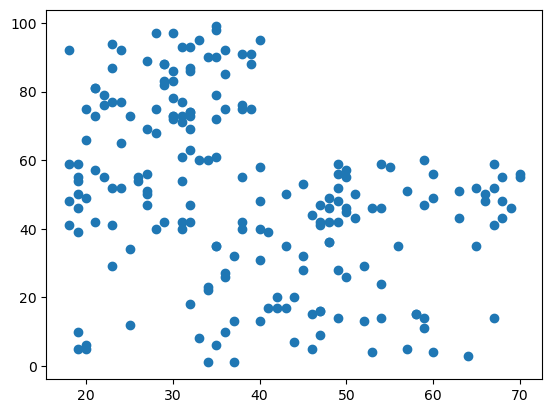

In [45]:
plt.scatter(dataset.iloc[:, 2], dataset.iloc[:, 4])

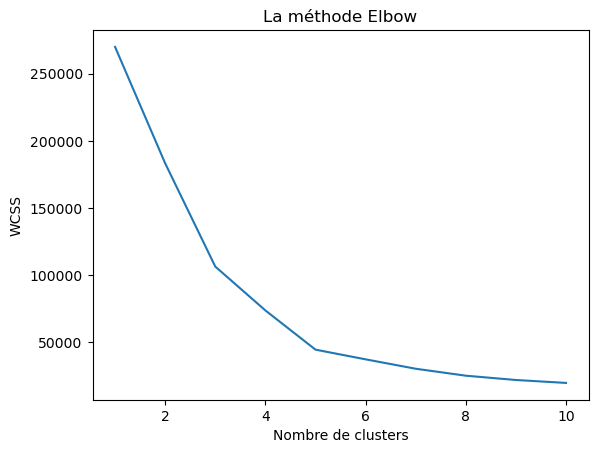

In [46]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters = k).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
# Construction du modèle
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

In [50]:
dataset["target"] =  y_kmeans
dataset.head()

,ClientID,Genre,Age,salaire,fidelite_1_100,target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


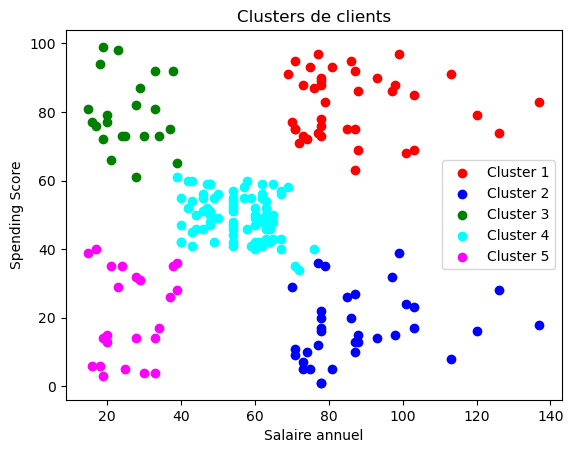

In [51]:
# Visualiser les résultats
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de clients')
plt.xlabel('Salaire annuel')
plt.ylabel('Spending Score')
plt.legend()